### Group Members:

- Name, matriculation number
- Name, matriculation number
- Name, matriculation number

# Assignment 1: Universal Function Approximator


The goal of this exercise is to compare three different neural network architectures and analyze their capacity for function approximation:

1. $N_1$: One-layer network (linear transformation only)
2. $N_2$: One-layer network with non-linear activation function
3. $N_3$: Two-layer network (hidden layer with non-linear activation function)

They will be trained via gradient descent (with weight decay). To show the flexibility of the approach, three different functions will be approximated:
1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

In the theoretical section, the networks will be designed, and the necessary derivatives will be computed by hand.

In the coding section, we will: 

- implement the networks and their gradients,
- generate target data for three different functions, 
- apply the training procedure to the data, and 
- plot the resulting approximated function together with the data samples.

## Section 1: Theoretical Questions

### Network Design

#### Task 1.1: Network Structure

Given input $\vec x = (1, x)^T$, define three neural networks ($N_1$, $N_2$, $N_3$) mathematically, to reach output $y$. Use $g()$ to represent the activation function.

Explain how their structures differ and analyze their function approximation capabilities.

--- 
Note:

For one-layer networks, define parameter $\Theta=\vec w \in\mathbb R^{D+1}$

For two-layer network, define parameters $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ that are split into $\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}}$ for the first layer and $\vec w^{(2)}\in\mathbb R^{K+1}$ for the second layer

$N_1$: ...

$N_2$: ...

$N_3$: ...

#### Task 1.2: Network Comparison

Can the one-layer network approximate all three functions well? Why or why not?

What advantages does the two-layer network have compared to a one-layer network?

How can we determine the appropriate number of hidden neurons?
When looking at the example plots in the OLAT, how many hidden neurons do we need in order to approximate the functions? Is there any difference between the three target functions?



...

#### Task 1.3: Network Performance

If the network struggles to approximate a function well, what are some possible reasons?

How can we improve the network's performance?


##### Reasons
...

##### Solutions
...

### Derivatives

#### Task 1.4: Activation Function

Given the hyperbolic tangent ($\tanh$) activation function as:

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Prove:

$$\frac{\partial}{\partial x} \tanh(x) = 1 - \tanh^2(x)$$

Hint: Apply the derivative rules as defined in the Lecture:
* Quotient rule
* Sum rule
* Exponential rule

Also, avoid factoring out parentheses.

$\frac{\partial}{\partial x} \tanh(x) =...$

#### Task 1.5: Weight Decay

Consider a loss function with L2 regularization (weight decay):
$$
L'(\theta) = L(\theta) + \frac{\lambda}{2} \|\theta\|^2
$$

Compute its derivative with respect to $\theta$: $$\frac{\partial}{\partial \theta} L'(\theta)$$


$\frac{\partial}{\partial \theta} L'(\theta) = ...$

#### Task 1.6

How large should an appropriate weight decay parameter $\lambda$ as shown in Task 1.5 be? What would happen if $\lambda$ is set too high or too low?

...

## Section 2: Coding

**<font color='red' size='5'>This section has to be submitted by 11:59 p.m. on Wednesday, March 12th, to be graded.</font>**



### Network Implementation
#### Task 2.1

Recall that for one-layer networks, we define parameter $\Theta=\vec w \in\mathbb R^{D+1}$, and for a two-layer network, we define parameters $\Theta=(\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}},\vec w^{(2)}\in\mathbb R^{K+1})$.

- D: The dimension of the input. In this assignment, $D = 1$ since there is only one input.
- K: The number of hidden neurons in the first layer of the two-layer network ($N_3$)

Implement a function that returns the network output for a given input $\vec x$, parameter(s) $\Theta$, and model_type ($N_1$, $N_2$, or $N_3$). Remember that the input of the function $\vec x = (1, x)^T$.

---
Note:

1. Use the `numpy` to implement the $\tanh$ function.
2. Use `numpy.concatenate` or `numpy.insert` to prepend $h_0$.
3. Make use of `numpy.dot` to compute matrix-vector and vector-vector products.

In [62]:
import numpy

def network(x, Theta, model_type):
    """
    Compute the output of a neural network model.

    Args:
        x: Input vector (1, x) including bias.
        Theta: Tuple of network parameters (W1, w2).
        model_type: Type of model (1, 2, or 3).

    Returns:
        y: Network output.
        h: Hidden layer output, or None.
    """

    W1, w2 = Theta # w2 is None if model_type is 1 or 2

    if model_type == 1:
        # One-layer network (Linear Model)
        y = numpy.dot(x, W1)
        return y, None # To make this consistent when model_type is 3

    elif model_type == 2:
        # One-layer network with tanh activation
        y = numpy.tanh(numpy.dot(x, W1))
        y = numpy.tanh(numpy.dot(x, W1))
        return y, None

    elif model_type == 3:
        # Two-layer network with tanh activation
        a_ = numpy.dot(W1, x)  # W1 shape: (K, D+1); x shape: (D+1,)
        h_ = numpy.tanh(a_)
        h = numpy.concatenate((numpy.array([1.]), h_))  # prepend bias term; h shape becomes (K+1,)
        y = numpy.dot(h, w2)  # w2 shape should be (K+1,)
        return y, h


#### Test 1: Sanity Check

We select a specific number of hidden neurons and create the weights accordingly, using all zeros in the first layer and all ones in the second. The test case below ensures that the function from Task 1 actually returns $11$ for those weights.

In [63]:
# Define test parameters
K = 20
D = 1
Theta_one_layer = [numpy.ones(D+1),None]
Theta_two_layer = [numpy.zeros((K, D+1)), numpy.ones(K+1)]
x = numpy.random.rand(D+1)

# Sanity check for N1
y1, _ = network(x, Theta_one_layer, 1)
assert abs(numpy.sum(x) - y1) < 1e-6
print("N1 test passed.")

# Sanity check for N2
y2, _ = network(x, Theta_one_layer, 2)
assert abs(numpy.tanh(numpy.sum(x)) - y2) < 1e-6
print("N2 test passed.")

# Sanity check for N3
y3, _ = network(x, Theta_two_layer, 3)
assert abs(1.0 - y3) < 1e-6
print("N3 test passed.")

N1 test passed.
N2 test passed.
N3 test passed.


### Gradient Implementation
#### Task 2.2: Gradient Computation


Implementation of a function that returns the gradient as defined for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, given weight(s) $\Theta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay.

---
Note:

We should make sure that both parts of the gradient are computed for $N_3$ (since $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ here).

This is a very slow implementation. We will see how to speed this up in the next lecture.

In [64]:
def compute_gradient(X, Theta, model_type, lambda_=1.):
    """
    Compute the gradient of the loss function w.r.t. the weights for each model type.
    """
    # Unpack parameters
    W1, w2 = Theta  # w2 is None if model_type is 1 or 2
    
    # Initialize gradients with same shape as parameters
    dW1 = numpy.zeros_like(W1, dtype=float)
    if model_type in [1, 2]:
        dw2 = None
    else:
        dw2 = numpy.zeros_like(w2, dtype=float)
    
    # Iterate over dataset
    for x, t in X:
        y, h = network(x, Theta, model_type)
        if model_type == 1:
            # Update via element-wise multiplication
            dW1 += (y - t) * x
        elif model_type == 2:
            dW1 += (1 - y**2) * (y - t) * x
        else:
            # For model N3: update W1 using only the neurons (excluding the bias in h)
            dW1 += numpy.outer(h[1:], (y - t))
            # Update second layer; h has full bias (shape K+1)
            dw2 += (y - t) * h

    # Add weight decay term
    dW1 += lambda_ * W1
    if model_type == 3:
        dw2 += lambda_ * w2
    
    return dW1, dw2


#### Task 2.3: Gradient Descent

The procedure of gradient descent is the repeated application of two steps.

1. The gradient of loss $\nabla_{\Theta}\mathcal J^{L_2}$ is computed based on the current value of the parameters $\Theta$.
2. The weights are updated by moving a small step in the direction of the negative gradient:

$$
\begin{align}
    \Theta = \Theta - \eta \nabla_{\Theta}\mathcal J
\end{align}
$$

As a stopping criterion, we select the number of training epochs to be 10000.

Implementation of a function that performs gradient descent for a given dataset $X$, given initial parameters $\Theta$, a given learning rate $\eta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay, and returns the optimized parameters $\Theta^*$.

In [65]:
def gradient_descent(X, Theta, eta, model_type, lambda_=1.):
    epochs = 10000
    # Convert Theta to a list for mutable updates.
    params = list(Theta)

    for _ in range(epochs):
        # Pass Theta as a tuple to compute_gradient if needed.
        dW1, dw2 = compute_gradient(X, tuple(params), model_type, lambda_)
        if model_type in [1, 2]:
            params[0] = params[0] - eta * dW1
        else:
            params[0] = params[0] - eta * dW1
            params[1] = params[1] - eta * dw2

    # Return as a tuple or list, depending on your usage.
    return tuple(params)


### Datasets

#### Task 2.4: Data Samples

In total, we will test our gradient descent function with three different datasets. Particularly, we approximate

1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

Generate dataset $X_1$,  for $N=60$ samples randomly drawn from range $x\in[-2,2]$. Generate data $X_2$ for $N=50$ samples randomly drawn from range $x\in[-1,1]$. Generate dataset $X_3$ for $N=200$ samples randomly drawn from range $x\in[-4,2.5]$. Implement all three datasets as lists of tuples: $\{(\vec x^{[n]}, t^{[n]})\mid 1\leq n\leq N\}$

In [66]:
# Dataset X1: t = cos(3x) for x in [-2, 2] with N=60 samples
N1 = 60
x_vals_X1 = numpy.random.uniform(-2, 2, N1)
X1 = [(numpy.array([1, x]), numpy.cos(3 * x)) for x in x_vals_X1]

# Dataset X2: t = exp(-x^2) for x in [-1, 1] with N=50 samples
N2 = 50
x_vals_X2 = numpy.random.uniform(-1, 1, N2)
X2 = [(numpy.array([1, x]), numpy.exp(-(x**2))) for x in x_vals_X2]

# Dataset X3: t = x^5 + 3x^4 - 6x^3 - 12x^2 + 5x + 129 for x in [-4, 2.5] with N=200 samples
N3 = 200
x_vals_X3 = numpy.random.uniform(-4, 2.5, N3)
X3 = [
    (numpy.array([1, x]), x**5 + 3 * x**4 - 6 * x**3 - 12 * x**2 + 5 * x + 129)
    for x in x_vals_X3
]

#### Test 2: Sanity Check

The test case below ensures that the elements of each generated dataset are tuples with two dimensions.

In [67]:
assert all(
    isinstance(x, (tuple,list)) and
    len(x) == 2 and
    isinstance(x[0], (tuple,list,numpy.ndarray)) and
    len(x[0] == 2) and
    isinstance(x[1], float)
    for X in (X1, X2, X3)
    for x in X
)

print('Test passed!')

Test passed!


### Function Approximation
Finally, we want to make use of our gradient descent implementation to approximate our functions. In order to see our success, we want to plot the functions together with the data.

#### Task 2.5: Define hidden Neurons
How many hidden neurons will we need for $N_3$? Use the answers from Task 1.2.

In [68]:
# Define the number of neurons for each target function based on your discussion
K1 = 5
K2 = 10
K3 = 15

#### Task 2.6: Random Parameters

For each of the networks, randomly initialize the parameters $\Theta_1,\Theta_2,\Theta_3\in[-1,1]$ for each of the datasets.

For $N_3$, use the number of hidden neurons estimated in Task 1.2 and implemented in Task 2.5.

---
Note:

  1. You can use `numpy.random.uniform` to initialize the weights.
  2. Make sure that the weight matrices are instantiated in the correct dimensions.
  3. Theta should always have two elements. The second element can be `None` for one-layer networks.


In [69]:
Theta_N1 = {
    "X1": (numpy.random.uniform(-1, 1, 2), None),
    "X2": (numpy.random.uniform(-1, 1, 2), None),
    "X3": (numpy.random.uniform(-1, 1, 2), None),
}

Theta_N2 = {
    "X1": (numpy.random.uniform(-1, 1, 2), None),
    "X2": (numpy.random.uniform(-1, 1, 2), None),
    "X3": (numpy.random.uniform(-1, 1, 2), None),
}

Theta_N3 = {
    "X1": (numpy.random.uniform(-1, 1, (K1, 2)), numpy.random.uniform(-1, 1, (K1 + 1,))),
    "X2": (numpy.random.uniform(-1, 1, (K2, 2)), numpy.random.uniform(-1, 1, (K2 + 1,))),
    "X3": (numpy.random.uniform(-1, 1, (K3, 2)), numpy.random.uniform(-1, 1, (K3 + 1,))),
}

#### Task 2.7: Run Gradient Descent

For each network, call gradient descent function from Task 2.3 using the datasets $X_1, X_2, X_3$, the according created parameters $\Theta_1,\Theta_2,\Theta_3$. Store the resulting optimized weights $\Theta_1^*, \Theta_2^*, \Theta_3^*$.

Based on your chosen learning rates $\eta$ and weight decay parameter $\lambda$, you may need to optimize them for these functions. Do you see any differences? What are the best learning rates that you can find?

---
<span style="color:red">WARNING: Depending on the implementation, this might run for several minutes!</span>

---
Note:

1. Start with $\eta=0.1$ and play around with the learning rate improve adaptation.
2. $\eta=0.1$ is too large for $X_3$.

In [70]:
# N1
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function
gradient_descent(X1, Theta_N1["X1"], 0.01, 1)
gradient_descent(X2, Theta_N1["X2"], 0.01, 1)
gradient_descent(X3, Theta_N1["X3"], 0.01, 1)

C:\Users\aster\AppData\Local\Temp\ipykernel_25932\2867201336.py:20: RuntimeWarning: overflow encountered in add
  dW1 += (y - t) * x


(array([nan, nan]), None)

In [71]:
# N2
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function
gradient_descent(X1, Theta_N2["X1"], 0.01, 2)
gradient_descent(X2, Theta_N2["X2"], 0.01, 2)
gradient_descent(X3, Theta_N2["X3"], 0.01, 2)

(array([ 4.90274626, -0.14482552]), None)

In [72]:
# N3
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function
gradient_descent(X1, Theta_N3["X1"], 0.001, 3)
gradient_descent(X2, Theta_N3["X2"], 0.001, 3)
gradient_descent(X3, Theta_N3["X3"], 0.001, 3)

C:\Users\aster\AppData\Local\Temp\ipykernel_25932\2867201336.py:25: RuntimeWarning: overflow encountered in add
  dW1 += numpy.outer(h[1:], (y - t))
C:\Users\aster\AppData\Local\Temp\ipykernel_25932\2867201336.py:27: RuntimeWarning: overflow encountered in add
  dw2 += (y - t) * h


(array([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]))

### Data and Function Plotting

### Task 2.8: Plotting Function

Implement a plotting function that takes a given dataset $X$, given parameters $\Theta$, model_type, and a defined range $R=[\min,\max]$. Each data sample $(x^{[n]},t^{[n]})$ of the dataset is plotted as an $''x''$. In order to plot the function that is approximated by the network, generate sufficient equally-spaced input values $x\in R$, compute the network output $y$ for these inputs, and plot them with a line.

---
Note:

  1. The dataset $X$ is defined as above, a list of tuples $(\vec x, t)$.
  2. Each input in the dataset is defined as $\vec x = (1,x)^T$.
  3. Equidistant points can be obtained via `numpy.arange`.


In [90]:
from matplotlib import pyplot
def plot(X, Theta, model_type, R):
  # first, plot data samples
  x = [x_[1] for x_, _ in X]
  t = [t_ for _, t_ in X]
  pyplot.plot(x, t, "bo", label="data")
  pyplot.xlabel("x")
  pyplot.ylabel("t")


  # define equidistant points from min (R[0]) to max (R[1]) to evaluate the network
  x = numpy.arange(R[0], R[1], 0.01)
  x = numpy.array([[1, x_] for x_ in x])

  # compute the network outputs for these values
  y = [network(x_, Theta, model_type)[0] for x_ in x]
  # plot network approximation
  pyplot.plot(x,y,"k-", label="network", color="red")
  pyplot.legend()

#### Task 2.9: Plot Three Functions

For each of the datasets and their optimized parameters, call the plotting function from Task 2.8. Use range $R=[-3,3]$ for dataset $X_1$, range $R=[-2,2]$ for $X_2$, and range $R=[-5,4]$ for dataset $X_3$.

Note that the first element of range $R$ should be the lowest $x$-location, and the second element of $R$ is the highest value for $x$.

Repeat for three networks.

C:\Users\aster\AppData\Local\Temp\ipykernel_25932\4229267540.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  pyplot.plot(x,y,"k-", label="network", color="red")


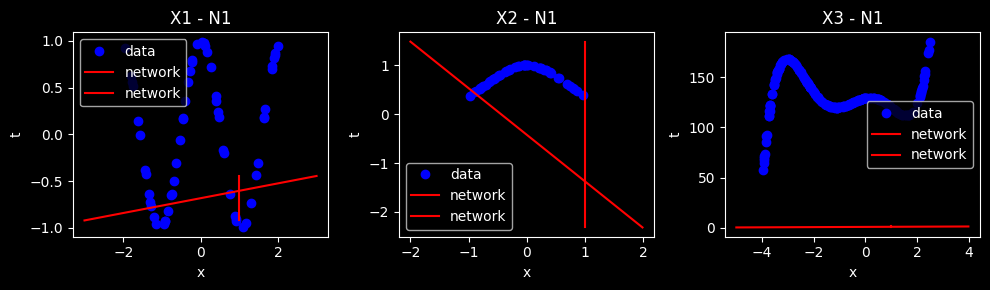

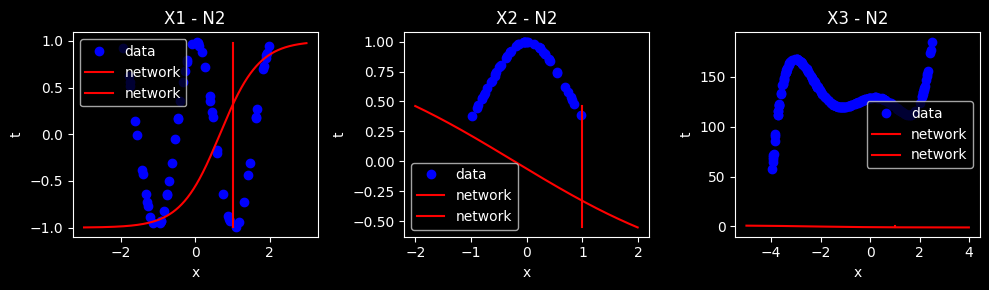

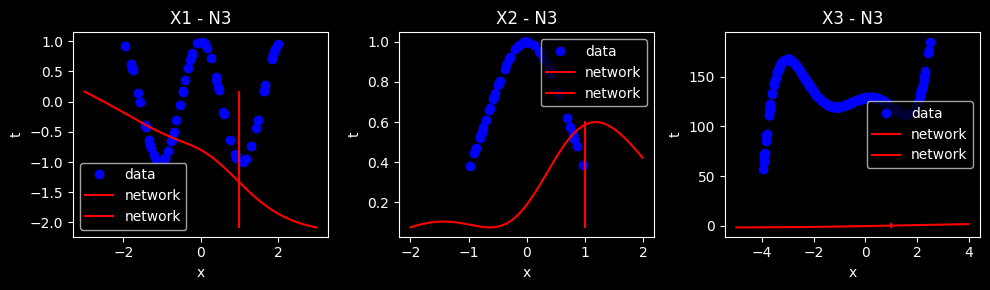

In [91]:
import matplotlib.pyplot as plt

# Example for Network N1 (one-layer linear network)
fig = plt.figure(figsize=(10, 3))
# Plot for dataset X1 with range R=[-3, 3]
plt.subplot(131)
plot(X1, Theta=Theta_N1["X1"], model_type=1, R=[-3, 3])
plt.title("X1 - N1")

# Plot for dataset X2 with range R=[-2, 2]
plt.subplot(132)
plot(X2, Theta=Theta_N1["X2"], model_type=1, R=[-2, 2])
plt.title("X2 - N1")

# Plot for dataset X3 with range R=[-5, 4]
plt.subplot(133)
plot(X3, Theta=Theta_N1["X3"], model_type=1, R=[-5, 4])
plt.title("X3 - N1")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Example for Network N2 (one-layer nonlinear network)
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot(X1, Theta=Theta_N2["X1"], model_type=2, R=[-3, 3])
plt.title("X1 - N2")
plt.subplot(132)
plot(X2, Theta=Theta_N2["X2"], model_type=2, R=[-2, 2])
plt.title("X2 - N2")
plt.subplot(133)
plot(X3, Theta=Theta_N2["X3"], model_type=2, R=[-5, 4])
plt.title("X3 - N2")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Example for Network N3 (two-layer network)
fig = plt.figure(figsize=(10, 3))
plt.subplot(131)
plot(X1, Theta=Theta_N3["X1"], model_type=3, R=[-3, 3])
plt.title("X1 - N3")
plt.subplot(132)
plot(X2, Theta=Theta_N3["X2"], model_type=3, R=[-2, 2])
plt.title("X2 - N3")
plt.subplot(133)
plot(X3, Theta=Theta_N3["X3"], model_type=3, R=[-5, 4])
plt.title("X3 - N3")
plt.tight_layout()
plt.show()